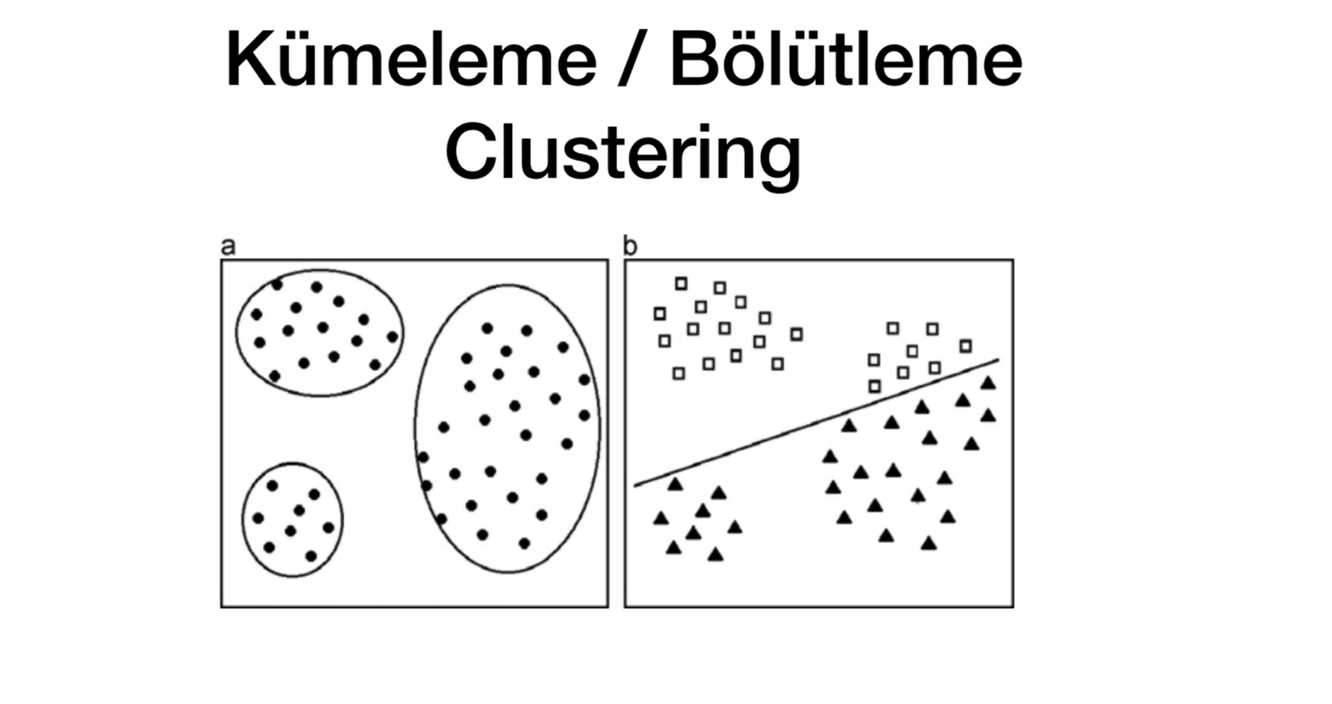
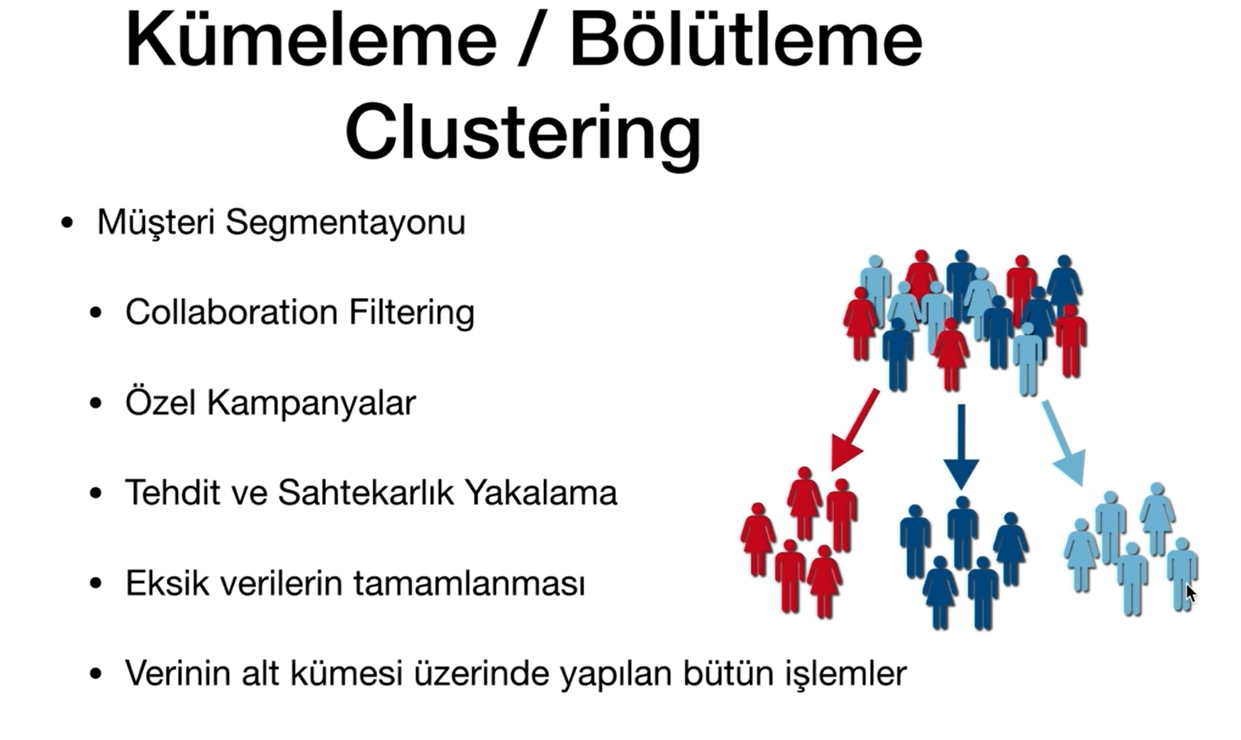
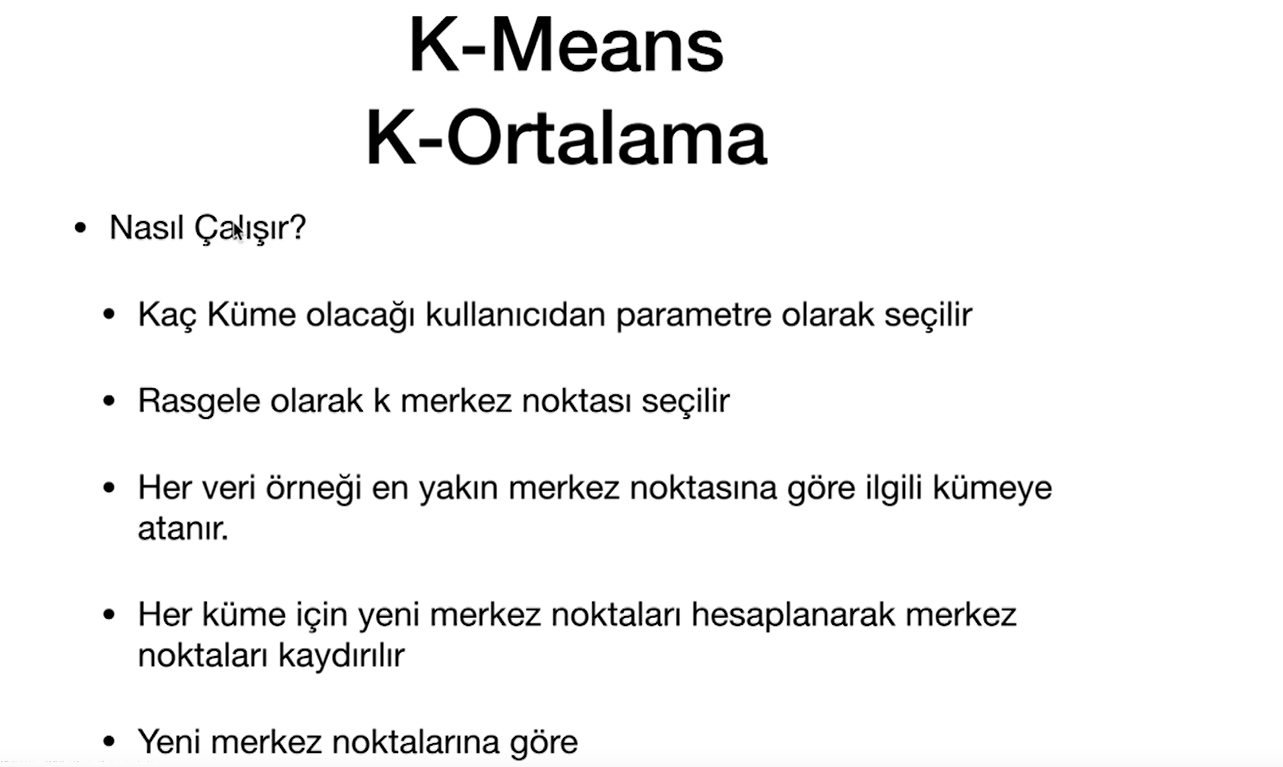
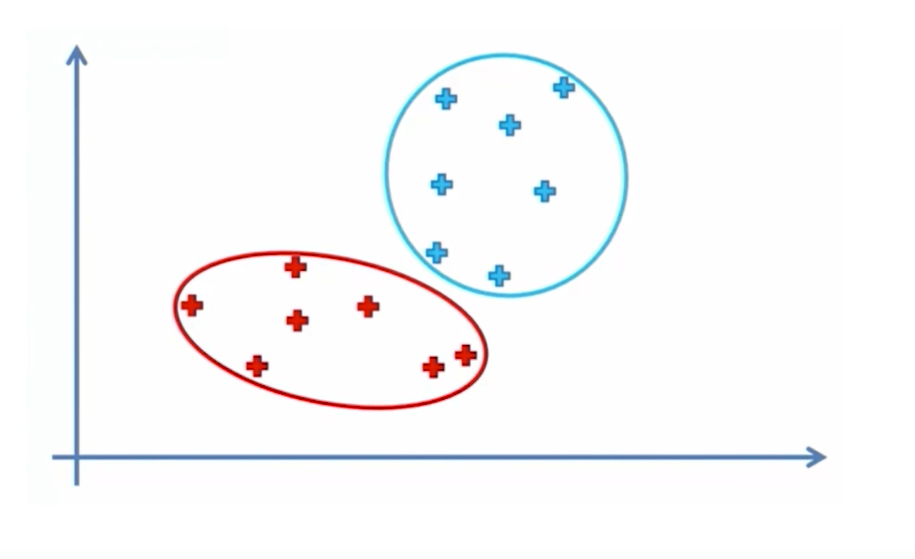
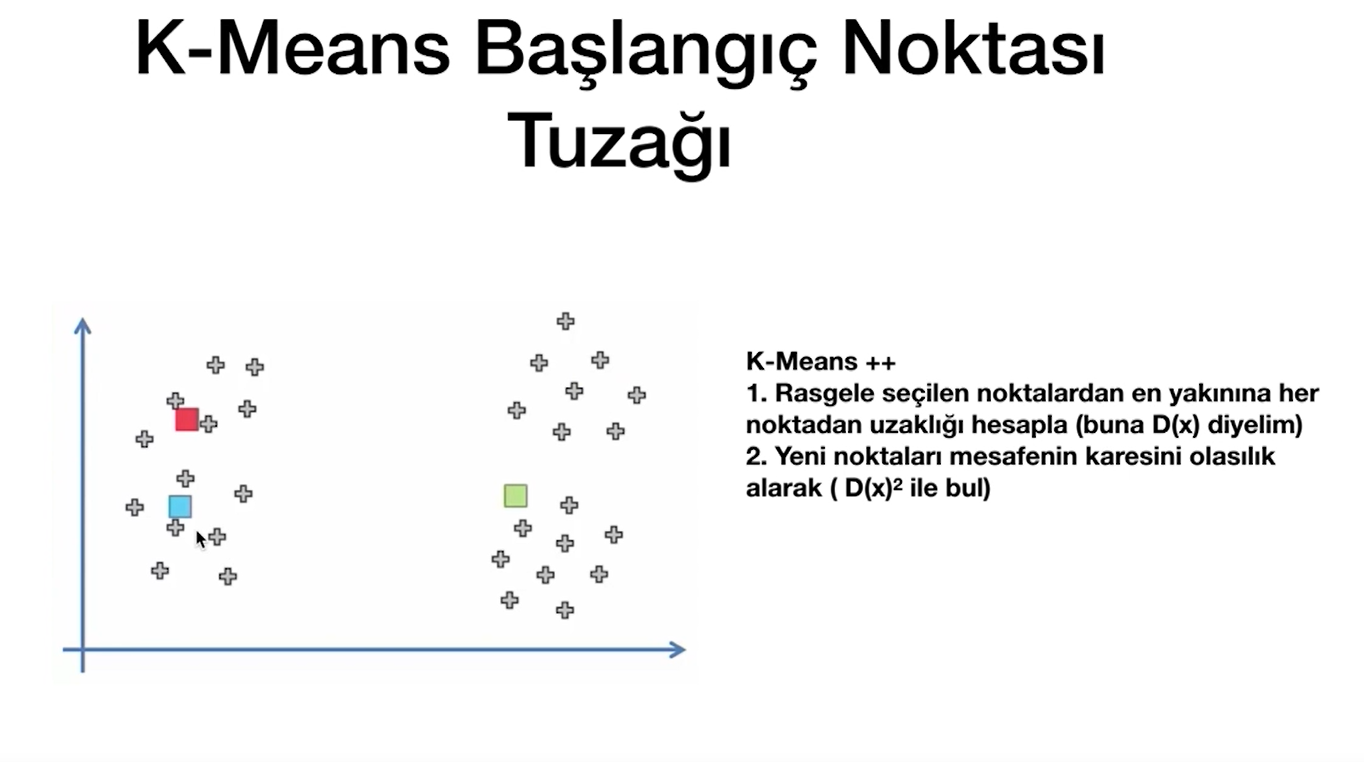
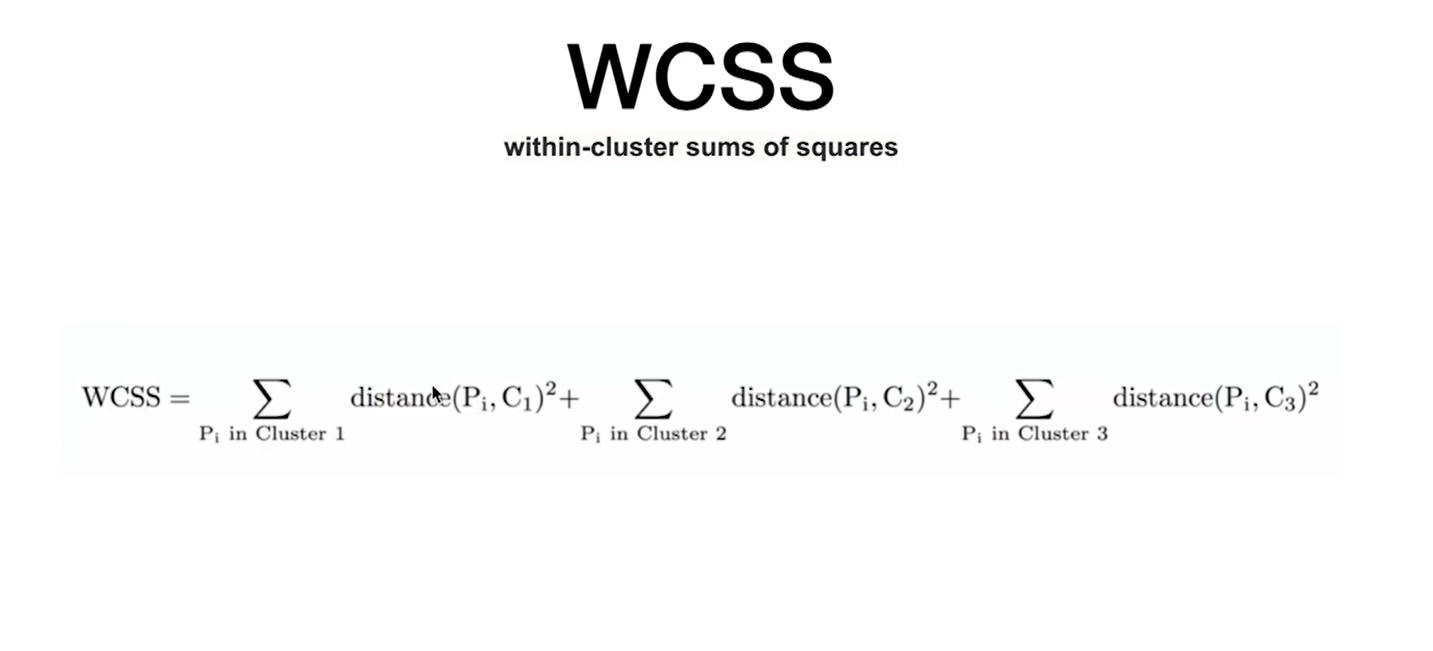
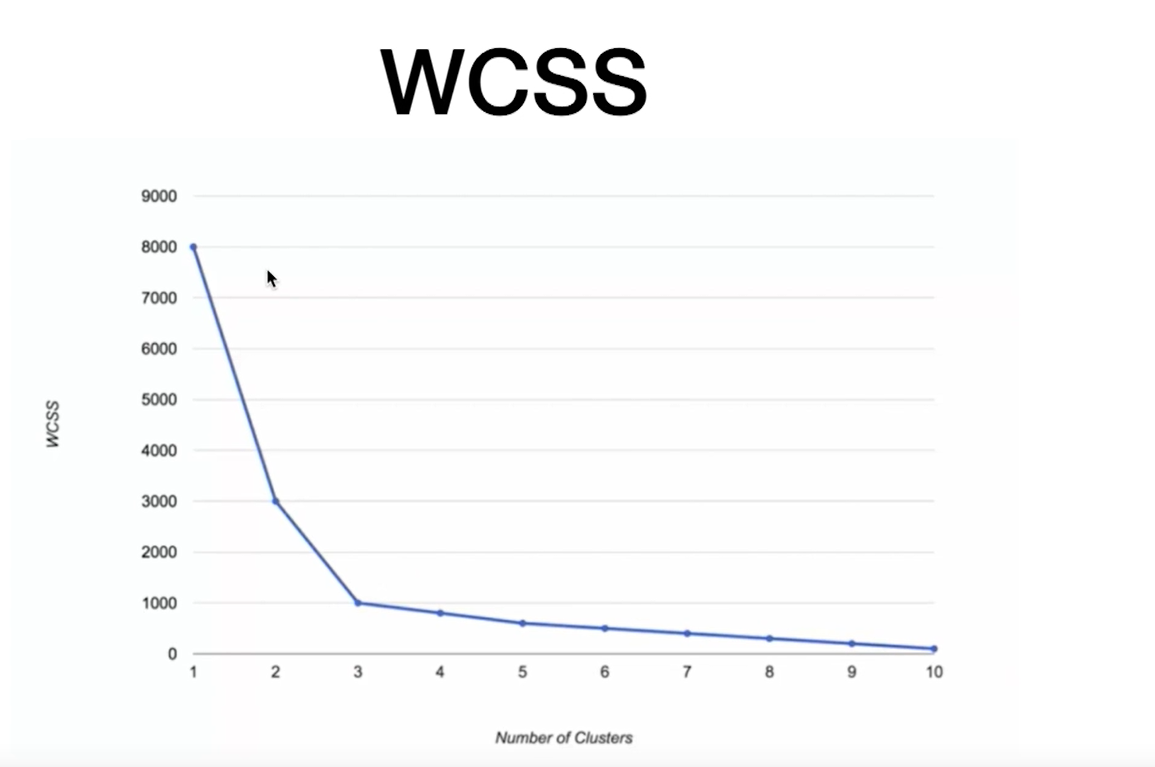

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings


warnings.filterwarnings('ignore')

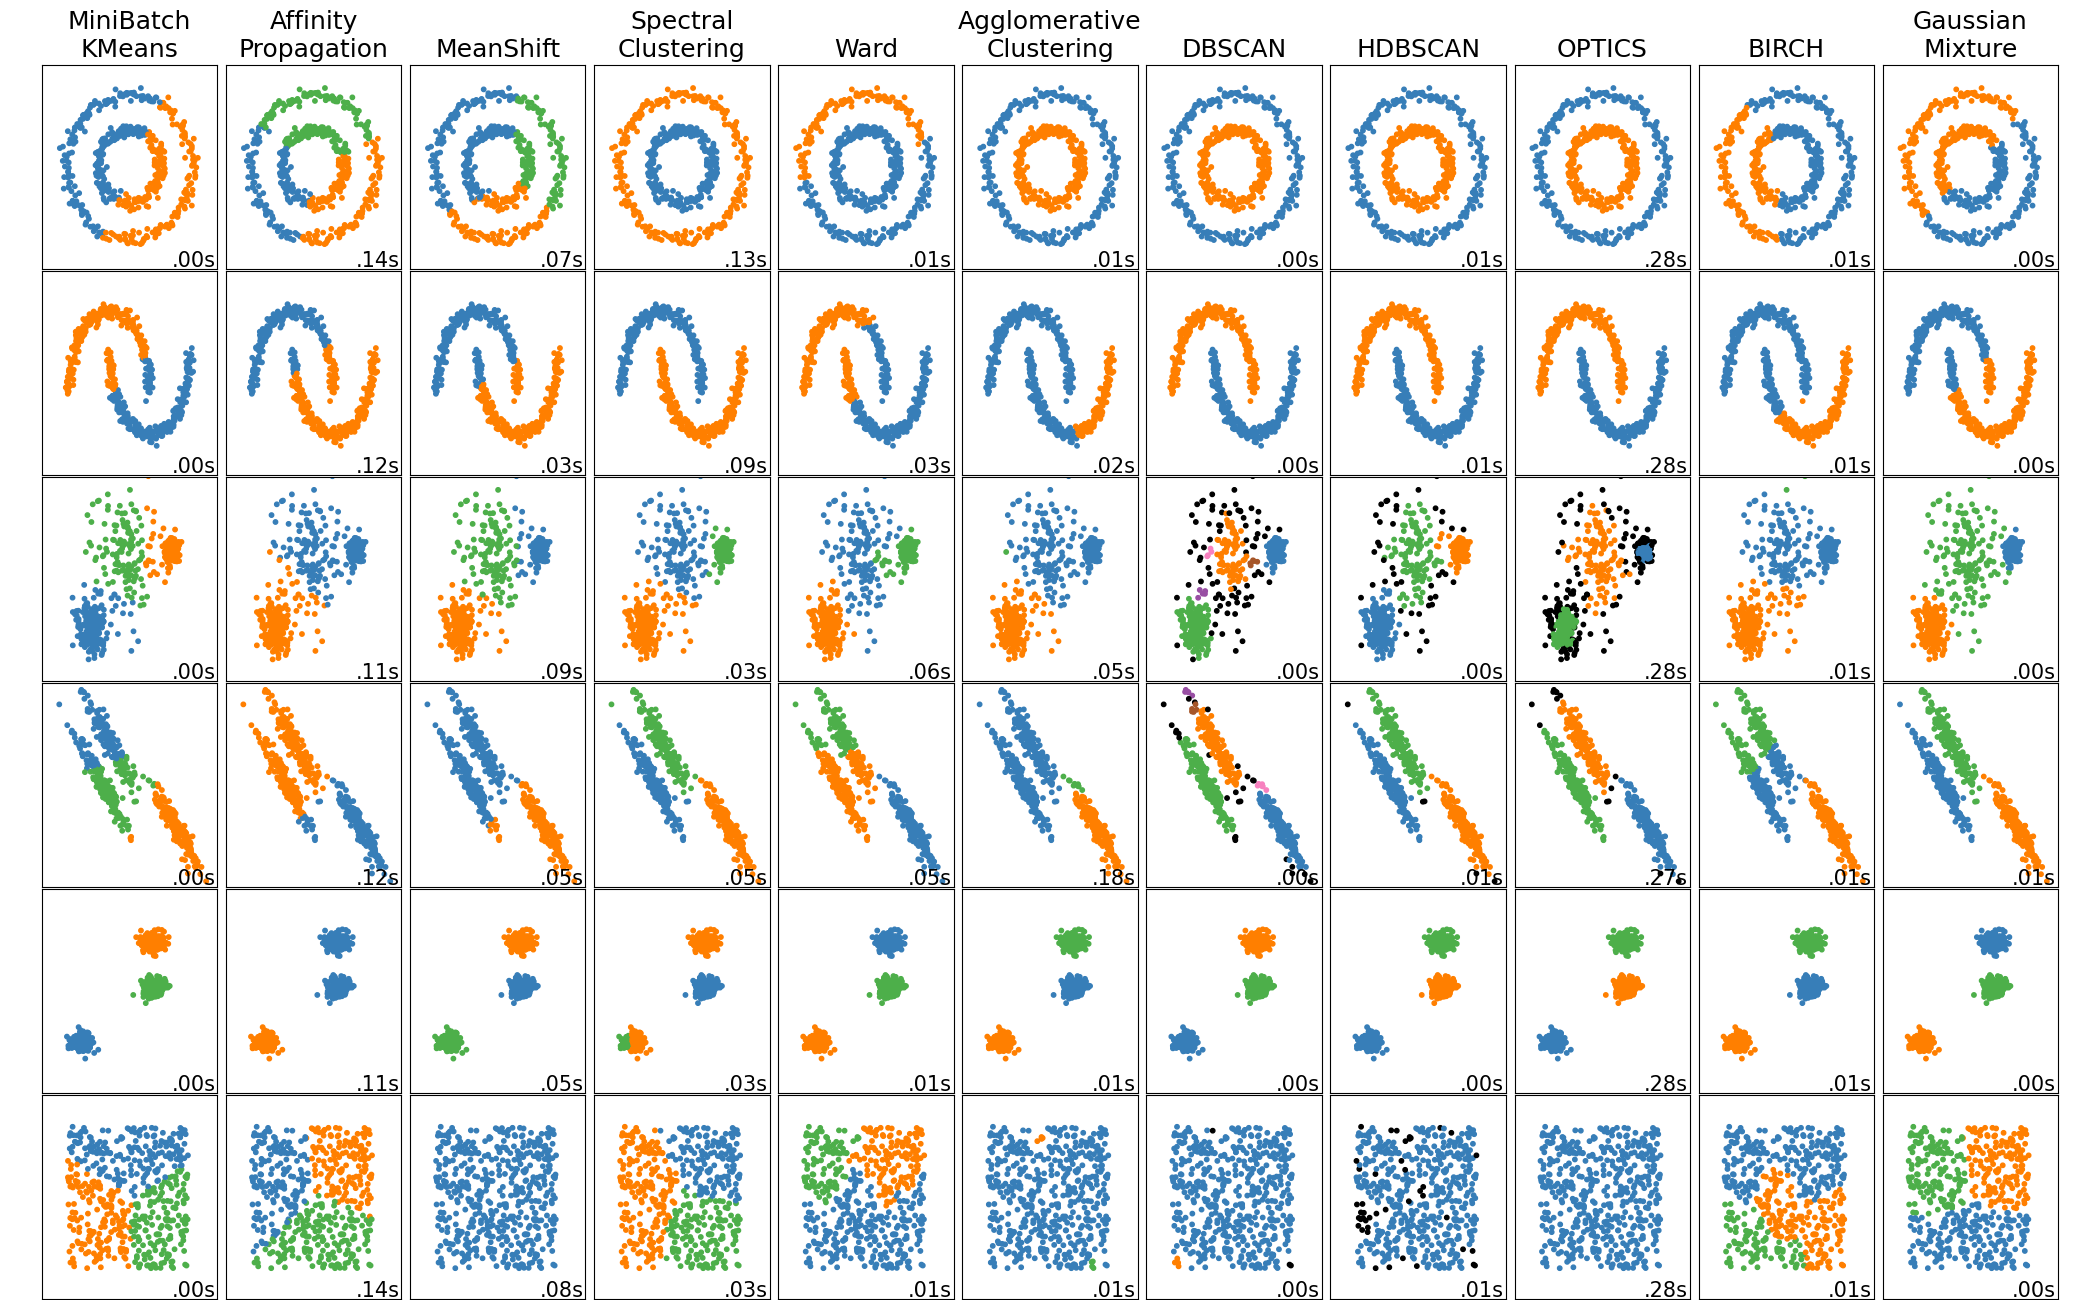
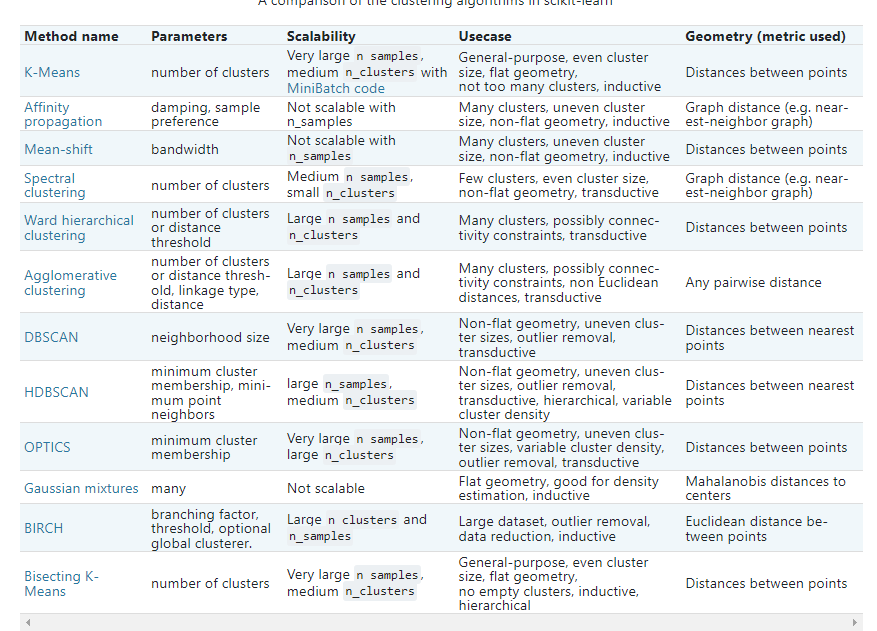
https://scikit-learn.org/stable/modules/clustering.html

In [2]:
veriler = pd.read_csv('musteriler.csv')

In [3]:
veriler.to_pickle('musteriler.pkl')

In [4]:
data = pd.read_pickle('veriler.pkl')

In [5]:
data

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [6]:
X = data.iloc[:,3:].values

k_means = KMeans(n_clusters=5, init='k-means++', n_init='warn', random_state=42, copy_x=True, algorithm='lloyd')
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [7]:
print(k_means.cluster_centers_)

[[ 86151.2195122    6818.29268293]
 [ 11325.           5269.375     ]
 [123163.15789474   7994.73684211]
 [ 33789.28571429   5253.57142857]
 [ 56968.18181818   5782.95454545]]


In [8]:
data

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


#### wcss değerlerini görelim

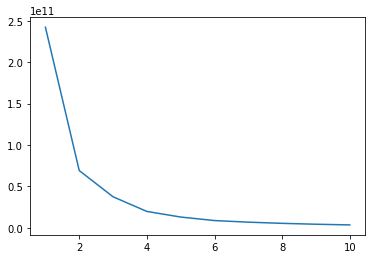

In [9]:
results = []

for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', n_init='warn', random_state=42, copy_x=True, algorithm='lloyd')
    k_means.fit(X)
    results.append(k_means.inertia_)

plt.plot(range(1,11), results)
plt.show()

###  X-means cluster yaklaşımı ile en optimize değeri 4 bulmuştum ve bu değer üzerinden kümelemeyi görselleştirelim

In [10]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

dfs = data.loc[:, ["Hacim", "Maas"]]
dfs.head()

,Hacim,Maas
0,69900,6325
1,79000,5200
2,85500,7825
3,17100,8375
4,5500,5450


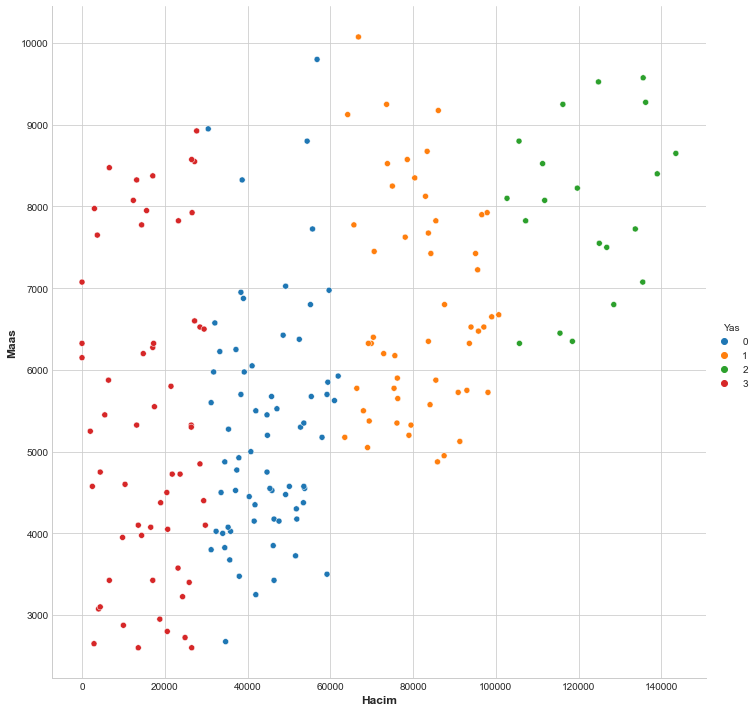

In [11]:
# Create cluster feature
kmeans = KMeans(n_clusters=4)
dfs["Yas"] = kmeans.fit_predict(X)
dfs["Yas"] = dfs["Yas"].astype("category")

sns.relplot(
    x="Hacim", y="Maas", hue="Yas", data=dfs, height=10,
);

### Normalizasyon işlemi yapsaydık neler olurdu acaba 

In [12]:
data = pd.read_pickle('veriler.pkl')

X = data.iloc[:,3:].values

minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [13]:
X

array([[0.48710801, 0.49832776],
       [0.55052265, 0.34782609],
       [0.59581882, 0.69899666],
       [0.11916376, 0.77257525],
       [0.03832753, 0.3812709 ],
       [0.18954704, 0.79598662],
       [0.14285714, 0.2541806 ],
       [0.48083624, 0.3277592 ],
       [0.09198606, 0.76588629],
       [0.22160279, 0.45150502],
       [0.41254355, 0.41471572],
       [0.66759582, 0.51839465],
       [0.32195122, 0.16722408],
       [0.20766551, 0.2006689 ],
       [0.57839721, 0.73913043],
       [1.        , 0.80936455],
       [0.63623693, 0.33779264],
       [0.06829268, 0.18060201],
       [0.55400697, 0.36454849],
       [0.46271777, 0.42474916],
       [0.1804878 , 0.10702341],
       [0.        , 0.59866221],
       [0.63344948, 0.4180602 ],
       [0.36097561, 0.22742475],
       [0.88362369, 0.65551839],
       [0.28432056, 0.32107023],
       [0.18397213, 0.36454849],
       [0.53031359, 0.36789298],
       [0.18466899, 0.        ],
       [0.25923345, 0.48829431],
       [0.

In [14]:
k_means = KMeans(n_clusters=4, init='k-means++', n_init='warn', random_state=42, copy_x=True, algorithm='lloyd')
k_means.fit(X)

KMeans(n_clusters=4, random_state=42)

In [15]:
print(k_means.cluster_centers_)

[[0.16954515 0.62026575]
 [0.5107408  0.43812709]
 [0.70383275 0.74108818]
 [0.21194755 0.21395881]]


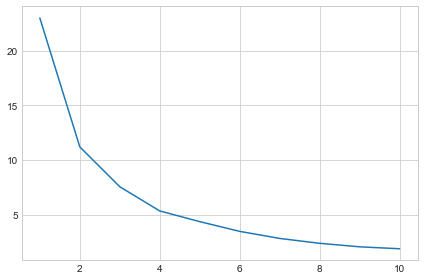

In [30]:
results = []

for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', n_init='warn', random_state=42, copy_x=True, algorithm='lloyd')
    k_means.fit(X)
    results.append(k_means.inertia_)

plt.plot(range(1,11), results)
plt.show()

#for i in range(1,11):
#    print(i)
#    print(results)
#    print("\n")

#### yine 4 cluster en mantıklısı duruyor

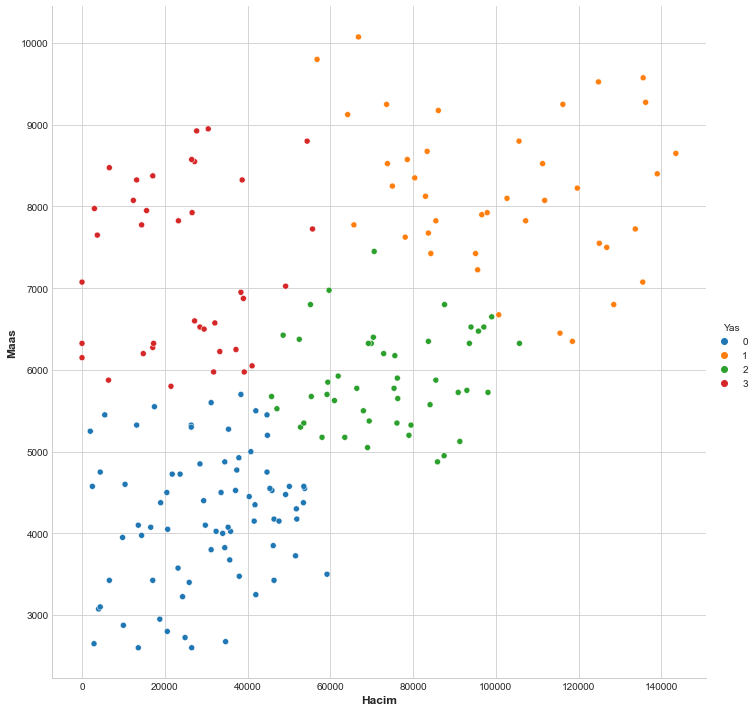

In [17]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

dfs = data.loc[:, ["Hacim", "Maas"]]

# Create cluster feature
kmeans = KMeans(n_clusters=4)
dfs["Yas"] = kmeans.fit_predict(X)
dfs["Yas"] = dfs["Yas"].astype("category")

sns.relplot(
    x="Hacim", y="Maas", hue="Yas", data=dfs, height=10,
);

In [18]:
data['Yas'] = data.Yas.astype("category").cat.codes


In [19]:
kmeans.fit(data.drop('Cinsiyet', axis=1))
data['Yas'] = data.Yas.astype("category").cat.codes

y = data['Maas']

In [20]:
data

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,38,69900,6325
1,2,K,10,79000,5200
2,3,E,30,85500,7825
3,4,E,35,17100,8375
4,5,E,33,5500,5450
...,...,...,...,...,...
195,196,E,3,96600,7900
196,197,E,19,83700,7675
197,198,K,6,34000,4000
198,199,K,10,42000,5500


In [21]:
print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
        2600       0.00      0.00      0.00       2.0
        2650       0.00      0.00      0.00       1.0
        2675       0.00      0.00      0.00       1.0
        2725       0.00      0.00      0.00       1.0
        2800       0.00      0.00      0.00       1.0
        2875       0.00      0.00      0.00       1.0
        2950       0.00      0.00      0.00       1.0
        3075       0.00      0.00      0.00       1.0
        3100       0.00      0.00      0.00       1.0
        3225       0.00      0.00      0.00       1.0
        3250       0.00      0.00      0.00       1.0
        340